<a href="https://colab.research.google.com/github/bishnuparajuli024/Racing-Bar-Chart-Analysis/blob/main/running_bar_chart_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving provinces.csv to provinces.csv


In [ ]:
import io

file_name = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[file_name]))

In [ ]:
display(df.head())

province  year  population                region
0    Adana  2007     2006650  Mediterranean Region
1    Adana  2008     2026319  Mediterranean Region
2    Adana  2009     2062226  Mediterranean Region
3    Adana  2010     2085225  Mediterranean Region
4    Adana  2011     2108805  Mediterranean Region

In [ ]:
current_year = 2018
dff = df[df['year'].eq(current_year)].sort_values(by='population', ascending=False).head(15)
dff

province  year  population                     region
479    Istanbul  2018    15067724             Marmara Region
83       Ankara  2018     5503985    Central Anatolia Region
491       Izmir  2018     4320519              Aegean Region
251       Bursa  2018     2994521             Marmara Region
95      Antalya  2018     2426356       Mediterranean Region
11        Adana  2018     2220125       Mediterranean Region
635       Konya  2018     2205609    Central Anatolia Region
815   Sanliurfa  2018     2035809  Southeast Anatolia Region
395   Gaziantep  2018     2028563  Southeast Anatolia Region
623     Kocaeli  2018     1906391             Marmara Region
695      Mersin  2018     1814468       Mediterranean Region
311  Diyarbakir  2018     1732396  Southeast Anatolia Region
443       Hatay  2018     1609856       Mediterranean Region
671      Manisa  2018     1429643              Aegean Region
563     Kayseri  2018     1389680    Central Anatolia Region

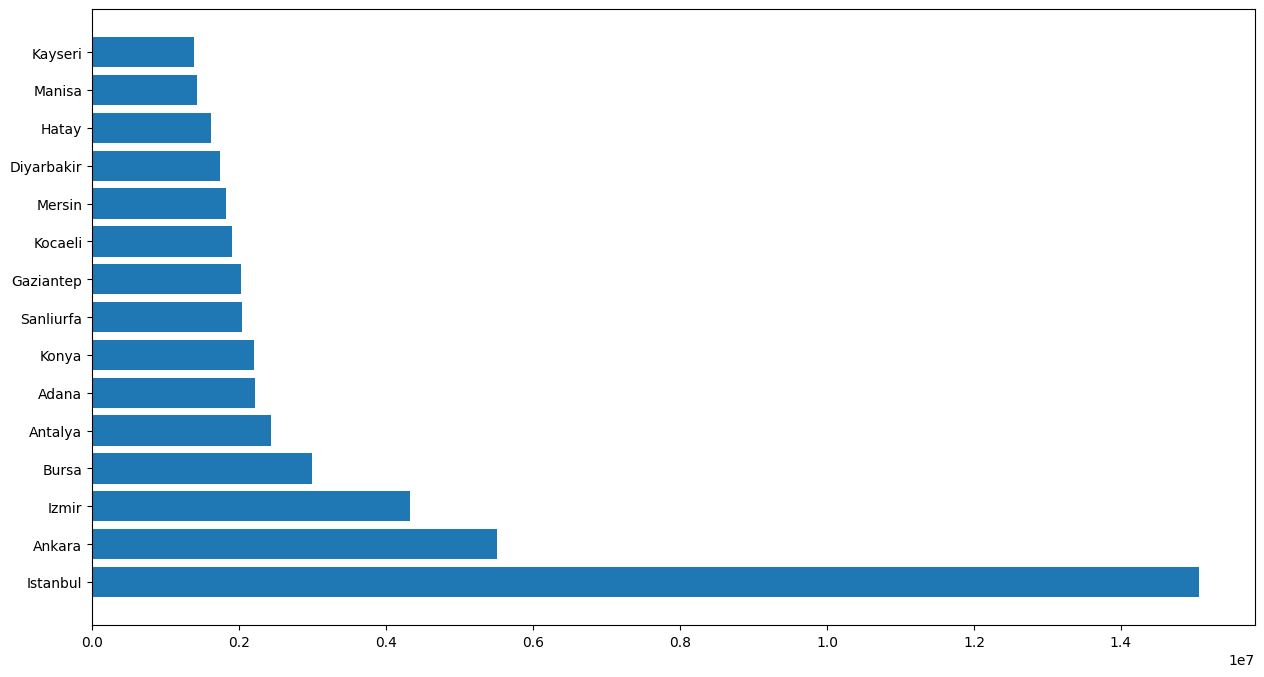

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(dff['province'], dff['population'])
colors = dict(zip(
    ['Marmara Region','Aegean Region','Mediterranean Region','Central Anatolia Region','Black Sea Region','Eastern Anatolia Region','Southeast Anatolia Region'],
    ['#adb0ff', '#ffb3ff', '#90d595', '#e48381', '#aafbff', '#f7bb5f', '#eafb50']
))
group_lk = df.set_index('province')['region'].to_dict()

Text(1, 0.4, '2018')

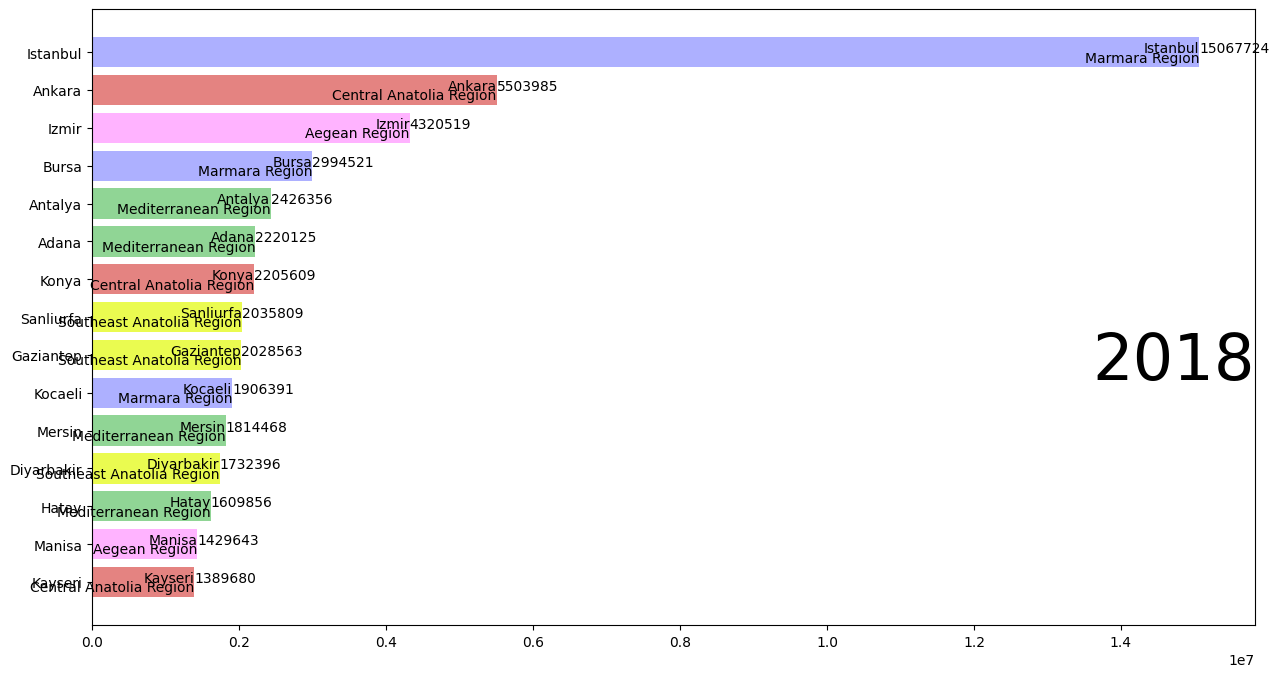

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
dff = dff[::-1]   # flip values from top to bottom
# pass colors values to `color=`
ax.barh(dff['province'], dff['population'], color=[colors[group_lk[x]] for x in dff['province']])
# iterate over the values to plot labels and values (Tokyo, Asia, 38194.2)
for i, (value, name) in enumerate(zip(dff['population'], dff['province'])):
    ax.text(value, i,     name,            ha='right')  # Tokyo: name
    ax.text(value, i-.25, group_lk[name],  ha='right')  # Asia: group name
    ax.text(value, i,     value,           ha='left')   # 38194.2: value
# Add year right middle portion of canvas
ax.text(1, 0.4, current_year, transform=ax.transAxes, size=46, ha='right')

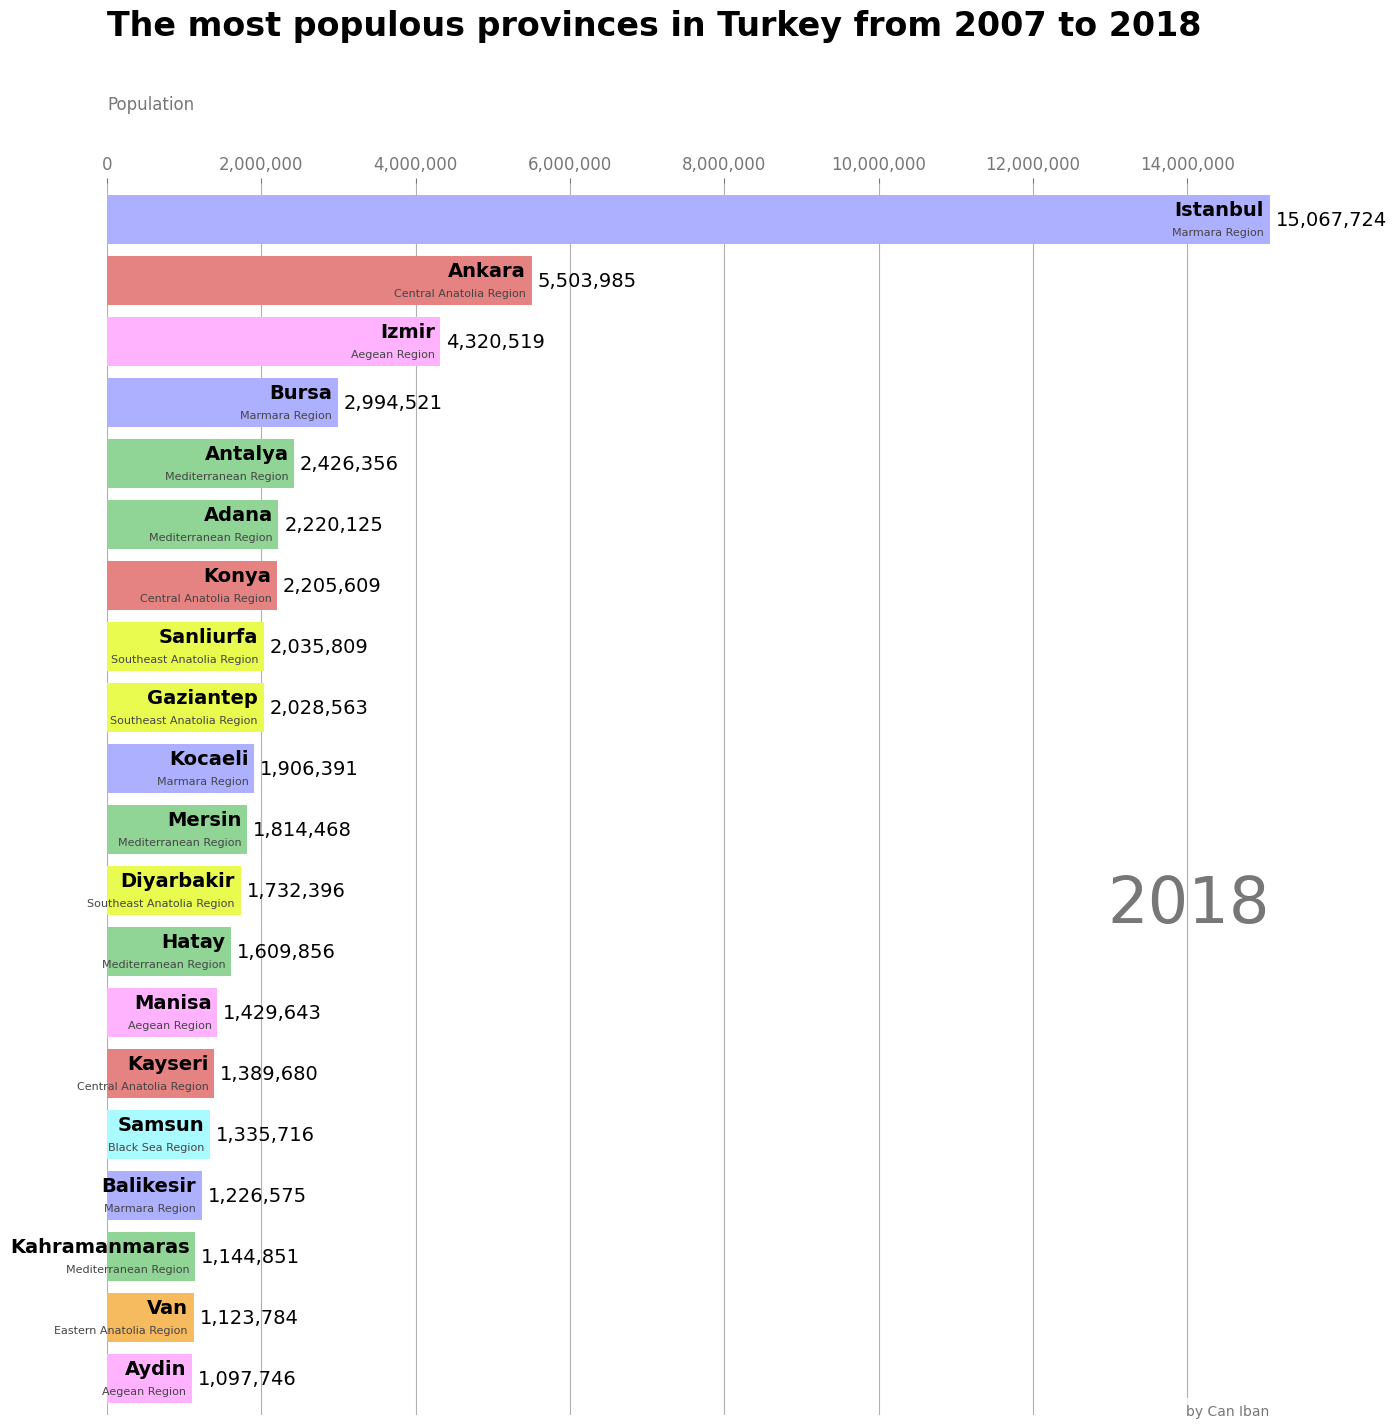

In [ ]:
fig, ax = plt.subplots(figsize=(15, 16))

def draw_barchart(year):
    dff = df[df['year'].eq(year)].sort_values(by='population', ascending=True).tail(20)
    ax.clear()
    ax.barh(dff['province'], dff['population'], color=[colors[group_lk[x]] for x in dff['province']])
    dx = dff['population'].max() / 200
    for i, (value, name) in enumerate(zip(dff['population'], dff['province'])):
        ax.text(value-dx, i,     name,           size=14, weight=800, ha='right', va='bottom')
        ax.text(value-dx, i-.25, group_lk[name], size=8, color='#444444', ha='right', va='baseline')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    # ... polished styles
    ax.text(1, 0.4, year, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=500)
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    ax.text(0, 1.12, 'The most populous provinces in Turkey from 2007 to 2018',
            transform=ax.transAxes, size=24, weight=600, ha='left')
    ax.text(1, 0, 'by Can Iban', transform=ax.transAxes, ha='right',
            color='#777777', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    plt.box(False)

draw_barchart(2018)


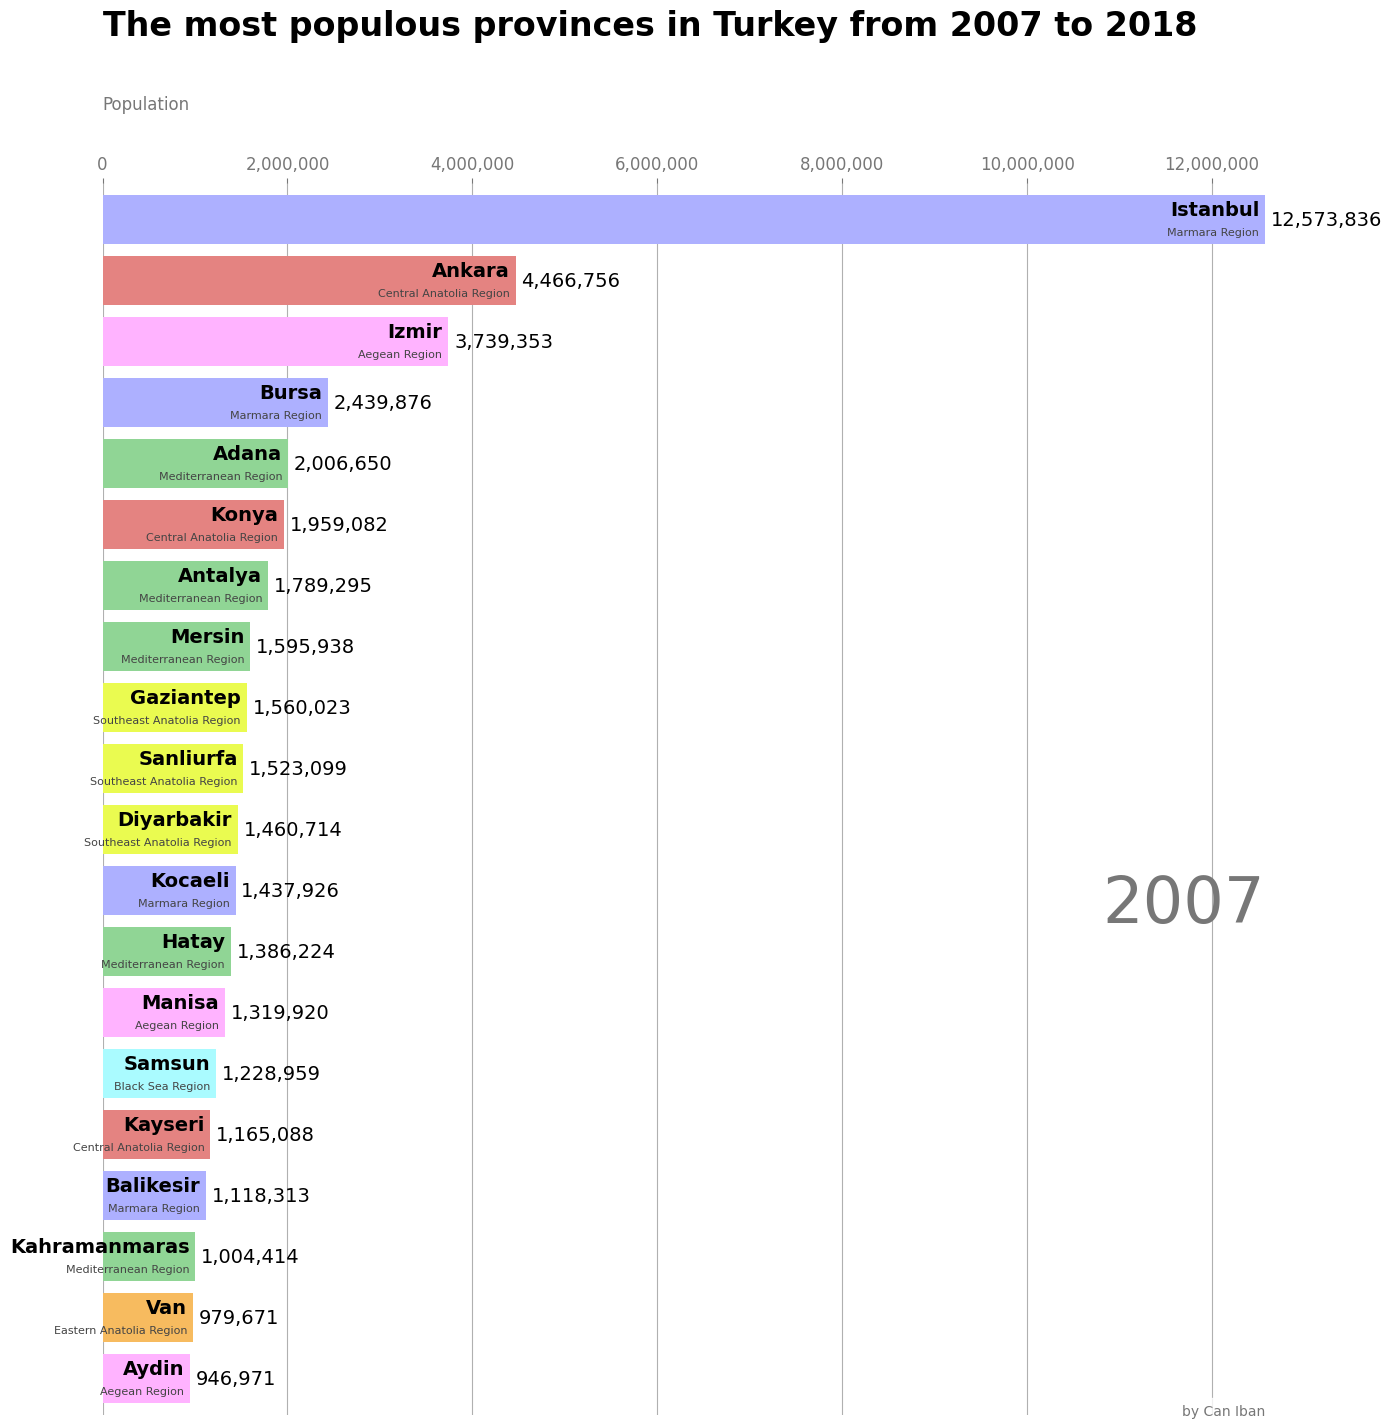

In [ ]:
import matplotlib.animation as animation
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(15, 16))
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(2007, 2018))
HTML(animator.to_jshtml())

In [ ]:
#running the race bar analysis using covid 19 data
! pip install bar-chart-race
#https://pypi.org/project/bar-chart-race/

In [ ]:
import bar_chart_race as bcr

In [ ]:
df=bcr.load_dataset('covid19_tutorial')
df

Belgium  China  France  Germany  Iran  Italy  Netherlands  Spain  \
date                                                                           
2020-04-03     1143   3326    6520     1275  3294  14681         1490  11198   
2020-04-04     1283   3330    7574     1444  3452  15362         1656  11947   
2020-04-05     1447   3333    8093     1584  3603  15887         1771  12641   
2020-04-06     1632   3335    8926     1810  3739  16523         1874  13341   
2020-04-07     2035   3335   10343     2016  3872  17127         2108  14045   
2020-04-08     2240   3337   10887     2349  3993  17669         2255  14792   
2020-04-09     2523   3339   12228     2607  4110  18279         2403  15447   
2020-04-10     3019   3340   13215     2767  4232  18849         2520  16081   
2020-04-11     3346   3343   13851     2894  4357  19468         2653  16606   
2020-04-12     3600   3343   14412     3022  4474  19899         2747  17209   

              USA  United Kingdom  
date                               
2020-04-03   7418            3611  
2020-04-04   8387            4320  
2020-04-05   9489            4943  
2020-04-06  10783            5385  
2020-04-07  12798            6171  
2020-04-08  14704            7111  
2020-04-09  16553            7993  
2020-04-10  18595            8974  
2020-04-11  20471            9892  
2020-04-12  22032           10629

In [ ]:
bcr.bar_chart_race(df, title='COVID19 TREND BY COUNTRIES')

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [ ]:
bcr.bar_chart_race(df,orientation='v',title='COVID19 TREND BY COUNTRIES')

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:294: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(self.df_values.columns, ha='right')
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:295: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([max_val] * len(ax.get_yticks()))
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:260: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), ha='right', rotation=30)


In [ ]:
bcr.bar_chart_race(df,sort='asc')

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [ ]:
bcr.bar_chart_race(df,n_bars=5)

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [ ]:
bcr.bar_chart_race(df,fixed_order=['Iran','USA','Italy'])

/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/usr/local/lib/python3.10/dist-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [1]:
#Country Population Race Bar Charts

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation

In [10]:
data_url = 'https://raw.githubusercontent.com/datasets/population/master/data/population.csv'
df = pd.read_csv(data_url, usecols=['Country Name','Year','Value'])

In [11]:
df

Country Name  Year     Value
0            Aruba  1960     54608
1            Aruba  1961     55811
2            Aruba  1962     56682
3            Aruba  1963     57475
4            Aruba  1964     58178
...            ...   ...       ...
16395     Zimbabwe  2017  14751101
16396     Zimbabwe  2018  15052184
16397     Zimbabwe  2019  15354608
16398     Zimbabwe  2020  15669666
16399     Zimbabwe  2021  15993524

[16400 rows x 3 columns]

In [12]:
df_pivot = df.pivot(index='Country Name',columns='Year',values='Value')